In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate

from warnings import simplefilter
simplefilter(action='ignore')

%store -r analysis_df
%store -r employees

ML_df = analysis_df.copy()

In [2]:
ML_df.columns = ML_df.columns.str.lower()
dummy_cols = ['gender','monthlyincome','department','workingfromhome','businesstravel','complaintfiled',
             'jobsatisfaction', 'performancerating']

ML_df_reduced = ML_df[dummy_cols]
ML_df_reduced.loc[:, 'department'] = ML_df_reduced.department.map({'Research & Development':'RD','Human Resources': 'HR','Sales':'Sales'})
ML_df_reduced.loc[:, 'workingfromhome'] = ML_df_reduced.workingfromhome.map({0:'n',1:'y'})
ML_df_reduced.loc[:, 'complaintfiled'] = ML_df_reduced.complaintfiled.map({0:'n',1:'y'})
ML_df_reduced.loc[:, 'id'] = np.arange(1, len(ML_df)+1)
ML_df_reduced.loc[:, 'left'] = ML_df.loc[:, 'left']

for col in dummy_cols:
    ML_df_reduced = pd.get_dummies(ML_df_reduced, columns=[col], prefix=[col])

ML_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                1474 non-null   int32 
 1   left                              1474 non-null   object
 2   gender_Female                     1474 non-null   bool  
 3   gender_Male                       1474 non-null   bool  
 4   monthlyincome_high                1474 non-null   bool  
 5   monthlyincome_low                 1474 non-null   bool  
 6   monthlyincome_medium              1474 non-null   bool  
 7   department_HR                     1474 non-null   bool  
 8   department_RD                     1474 non-null   bool  
 9   department_Sales                  1474 non-null   bool  
 10  workingfromhome_n                 1474 non-null   bool  
 11  workingfromhome_y                 1474 non-null   bool  
 12  businesstravel_Non-T

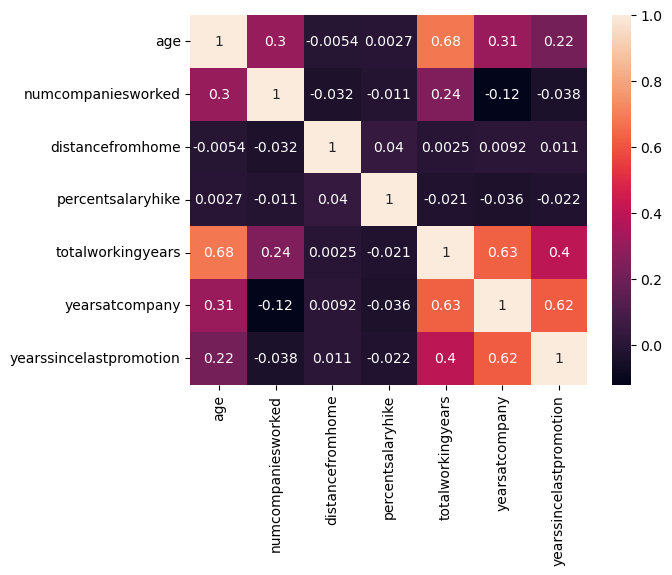

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ageGroup_18-24              1474 non-null   bool 
 1   ageGroup_25-35              1474 non-null   bool 
 2   ageGroup_36-49              1474 non-null   bool 
 3   ageGroup_50-60              1474 non-null   bool 
 4   distanceGroup_close         1474 non-null   bool 
 5   distanceGroup_far           1474 non-null   bool 
 6   distanceGroup_medium        1474 non-null   bool 
 7   salaryhikeGroup_<=15        1474 non-null   bool 
 8   salaryhikeGroup_>15         1474 non-null   bool 
 9   totworkyrsGroup_entry       1474 non-null   bool 
 10  totworkyrsGroup_junior      1474 non-null   bool 
 11  totworkyrsGroup_leader      1474 non-null   bool 
 12  totworkyrsGroup_senior      1474 non-null   bool 
 13  yrsatcompGroup_0-2          1474 non-null   bool 
 14  yrsatcom

In [3]:
other_cols = ['age','numcompaniesworked','distancefromhome','percentsalaryhike',
             'totalworkingyears','yearsatcompany','yearssincelastpromotion']

ML_df_reduced2 = ML_df[other_cols]

sns.heatmap(ML_df_reduced2.corr(),
            annot=True)
plt.show()

ML_df_reduced2.loc[:, 'ageGroup'] = ML_df_reduced2.age.apply(lambda x: '18-24' if x < 25
                                                              else ('25-35' if (x >= 25) & (x <= 35)
                                                              else ('36-49' if (x > 35) & (x < 50) else '50-60')))

ML_df_reduced2.loc[:, 'distanceGroup'] = ML_df_reduced2.distancefromhome.apply(lambda x: 'close' if x <= 5
                                                                                else ('medium' if (x > 5) & (x <= 10)
                                                                                else 'far'))

ML_df_reduced2.loc[:, 'salaryhikeGroup'] = ML_df_reduced2.percentsalaryhike.apply(lambda x: '<=15' if x <= 15 else '>15')

ML_df_reduced2.loc[:, 'totworkyrsGroup'] = ML_df_reduced2.totalworkingyears.apply(lambda x: 'entry' if x <= 1
                                                                                   else ('junior' if (x >= 2) & (x <= 4)
                                                                                   else ('senior' if (x >= 5) & (x <= 10)
                                                                                   else 'leader')))

ML_df_reduced2.loc[:, 'yrsatcompGroup'] = ML_df_reduced2.yearsatcompany.apply(lambda x: '0-2' if x <= 2
                                                                               else('3-6' if (x >= 3) & (x <= 6)
                                                                               else '>6'))

ML_df_reduced2.loc[:, 'yrspromotionGroup'] = ML_df_reduced2.yearssincelastpromotion.apply(lambda x: 'recent' if x<=2 else 'longtime')

ML_df_reduced2 = ML_df_reduced2.drop(columns = other_cols)

dummy_cols2 = ['ageGroup','distanceGroup','salaryhikeGroup','totworkyrsGroup',
                'yrsatcompGroup','yrspromotionGroup']

for col in dummy_cols2:
    ML_df_reduced2 = pd.get_dummies(ML_df_reduced2, columns=[col], prefix=[col])
    
ML_df_reduced2['id'] = np.arange(1,len(ML_df_reduced2) + 1)

ML_df_reduced2.info()

In [4]:
ML_DF = pd.merge(ML_df_reduced,
                 ML_df_reduced2,
                 how='outer')

ML_DF = ML_DF.drop(columns='id')

ML_DF.head()

,left,gender_Female,gender_Male,monthlyincome_high,monthlyincome_low,monthlyincome_medium,department_HR,department_RD,department_Sales,workingfromhome_n,...,salaryhikeGroup_>15,totworkyrsGroup_entry,totworkyrsGroup_junior,totworkyrsGroup_leader,totworkyrsGroup_senior,yrsatcompGroup_0-2,yrsatcompGroup_3-6,yrsatcompGroup_>6,yrspromotionGroup_longtime,yrspromotionGroup_recent
0,No,True,False,False,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
1,No,False,True,False,True,False,False,True,False,True,...,False,False,False,False,True,False,False,True,True,False
2,No,True,False,False,False,True,False,True,False,False,...,False,False,False,False,True,True,False,False,False,True
3,No,False,True,True,False,False,False,True,False,True,...,False,False,False,True,False,False,False,True,False,True
4,No,False,True,False,False,True,False,True,False,True,...,False,False,False,False,True,False,False,True,False,True


In [5]:
X = ML_DF.drop(columns = ['left'])
y = ML_DF.loc[:, 'left']

test_size = .25

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = test_size, random_state = 1)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

The accuracy of our Logistic Regression model is 66.4%.


Feature                             Coefficient
--------------------------------  -------------
gender_Female                        -0.142118
gender_Male                           0.14193
monthlyincome_high                   -0.221801
monthlyincome_low                     0.605319
monthlyincome_medium                 -0.383706
department_HR                         0.047157
department_RD                        -0.394302
department_Sales                      0.346957
workingfromhome_n                    -0.0584119
workingfromhome_y                     0.058224
businesstravel_Non-Travel            -0.576597
businesstravel_Travel_Frequently      0.611681
businesstravel_Travel_Rarely         -0.035272
complaintfiled_n                      0.1128
complaintfiled_y                     -0.112988
jobsatisfaction_1                     0.29917
jobsatisfaction_2                     0.125137
jobsatisfaction_3                     0.0204098
jobsatisfaction_4                    -0.444905
performancera

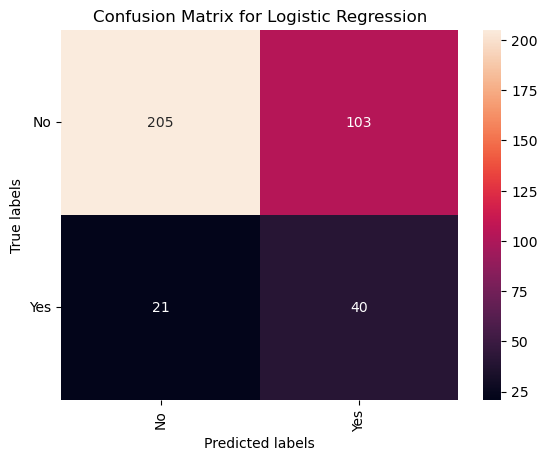

In [6]:
lr = LogisticRegression(max_iter=1000,
                        random_state=0,
                        class_weight='balanced')

lr.fit(X_train,y_train)
lr_y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)

print(f'The accuracy of our Logistic Regression model is {np.round(lr_accuracy*100, 2)}%.')

lr_cm = confusion_matrix(y_test,lr_y_pred)
lr_labels = lr.classes_

ax = plt.subplot()
sns.heatmap(lr_cm, annot=True, ax = ax,fmt="d");
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Logistic Regression');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(lr_labels) 
ax.yaxis.set_ticklabels(lr_labels)

feature_importance = list(zip(lr.feature_names_in_,lr.coef_[0]))
print(tabulate(feature_importance,
               headers=['Feature','Coefficient']))

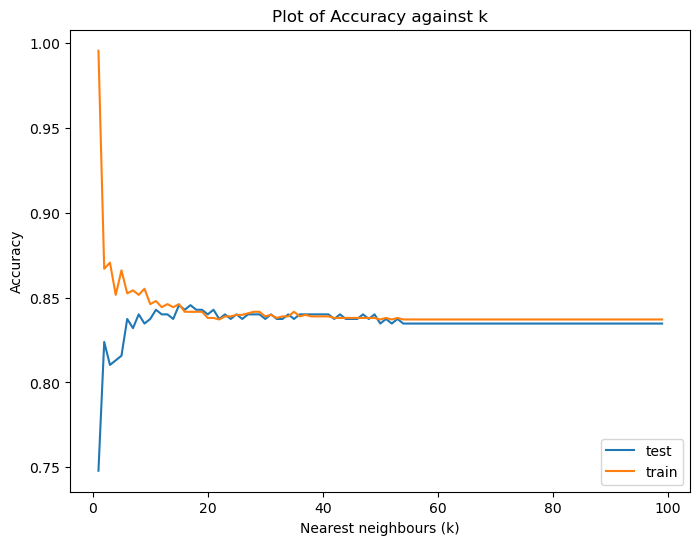

     k  accuracy
16  17  0.845528
14  15  0.845528
20  21  0.842818
18  19  0.842818
17  18  0.842818
Our best K Nearest Neighbours model is obtained with k = 15 with an accuracy of 84.6%.


In [7]:
ks, KNN_scores, KNN_train_scores = [], [], []

for k in range(1,100):
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(X_train, y_train)
    KNN_preds = KNN.predict(X_test)
    KNN_train_preds = KNN.predict(X_train)
    KNN_accuracy = accuracy_score(y_test,KNN_preds)
    KNN_train_accuracy = accuracy_score(y_train,KNN_train_preds)
    ks.append(k)
    KNN_scores.append(KNN_accuracy)
    KNN_train_scores.append(KNN_train_accuracy)
    
fig = plt.figure(figsize=(8,6))
ks = np.array(ks)
KNN_scores = np.array(KNN_scores)
KNN_train_scores = np.array(KNN_train_scores)
plt.plot(ks,KNN_scores,label='test')
plt.plot(ks,KNN_train_scores,label='train')
plt.legend(loc='lower right')
plt.xlabel('Nearest neighbours (k)')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy against k')
plt.show()


# make DataFrame of k's with corresponding accuracies for easy access
KNN_scores_df = pd.DataFrame({'k':ks,'accuracy':KNN_scores})

# get top 5 k's with best accuracies
print(KNN_scores_df.sort_values(by='accuracy',ascending=False)[:5])

KNN_best_k = KNN_scores_df.iloc[KNN_scores_df.accuracy.argmax(),0]
KNN_best_k_accuracy = KNN_scores_df.accuracy.max()

print(f'Our best K Nearest Neighbours model is obtained with k = {KNN_best_k} \
with an accuracy of {np.round(KNN_best_k_accuracy*100,1)}%.')

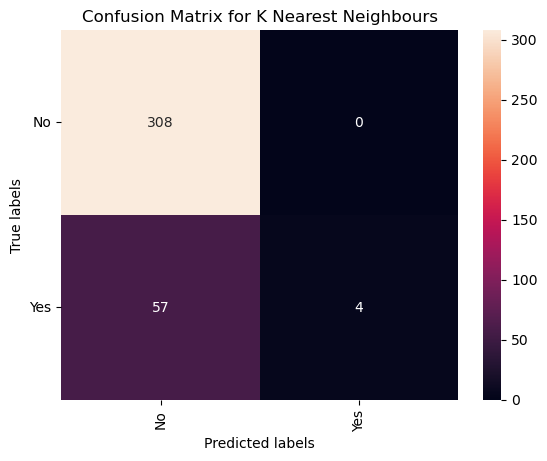

In [8]:
best_KNN = KNeighborsClassifier(n_neighbors = KNN_best_k)

best_KNN.fit(X_train, y_train)
best_KNN_pred = best_KNN.predict(X_test)
best_KNN_cm = confusion_matrix(y_test, best_KNN_pred)
best_KNN_labels = best_KNN.classes_

ax2 = plt.subplot()
sns.heatmap(best_KNN_cm,
            annot=True,
            ax = ax2,
            fmt="d")

# labels, title and ticks
ax2.set_xlabel('Predicted labels');
ax2.set_ylabel('True labels'); 
ax2.set_title('Confusion Matrix for K Nearest Neighbours');
ax2.yaxis.set_tick_params(rotation=360)
ax2.xaxis.set_tick_params(rotation=90)

ax2.xaxis.set_ticklabels(best_KNN_labels) 
ax2.yaxis.set_ticklabels(best_KNN_labels)

plt.show()